In [ ]:
"""
Celem tego badania jest sprawdzenie wpływu różnych czynników na wystąpienie bądź nie udaru u człowieka.
W związku z tym zostanie przeprowadzona analiza danych, odpowiednie przygotowanie zbioru,
a następnie stworzenie modeli przewidujących, czy pacjent przejdzie udar, czy też nie (wartość w kolumnie 'stroke').

Uwagi można kierować na discorda: dobosh#5559 albo na maila: s97583@pollub.edu.pl / dominika.dobosz23@gmail.com
"""

"\nCelem tego badania jest sprawdzenie wpływu różnych czynników na wystąpienie bądź nie udaru u człowieka.\nW związku z tym zostanie przeprowadzona analiza danych, odpowiednie przygotowanie zbioru,\na następnie stworzenie modeli przewidujących, czy pacjent przejdzie udar, czy też nie (wartość w kolumnie 'stroke').\n\nUwagi można kierować na discorda: dobosh#5559 albo na maila: s97583@pollub.edu.pl / dominika.dobosz23@gmail.com\n"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
"""
Zadanie rozpoczęłam od wczytania zbioru, wyświetlenia zawierających się w nim kolumn oraz kilku pierwszych wierszy.
Mamy kolumnę id, która napewno zostanie usunięta, płeć, wiek, to czy pacjent ma bądź nie ma nadciśnienia albo choroby serca,
to czy był kiedykolwiek w związku małżeńskim, typ pracy, to czy mieszka w mieście bądź na wsi, poziom glukozy we krwi, BMI,
czy pali i na koniec czy przeszedł udar.
"""
healthcare = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=",")
columns = healthcare.columns.to_list()
print("KOLUMNY: ", columns)
healthcare.head()

KOLUMNY:  ['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,NaN,never smoked,1


In [ ]:
#Usunęłam kolumnę 'id', która nic nie wnosi do zbioru danych.
healthcare.drop(columns=['id'], inplace=True)

#Dla estetyki zmieniłam nazwę kolumny, żeby wszystkie rozpoczynały się od małej litery.
healthcare.rename(columns={'Residence_type': 'residence_type'}, inplace=True)

#Sprawdziłam wymiary zbioru (ilość wierszy i kolumn) oraz informacje o kolumnach (ilość wartości niepustych oraz ich typ).
print("Wymiary zbioru: ", healthcare.shape)
healthcare.info()

Wymiary zbioru:  (5110, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5070 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   residence_type     5082 non-null   object 
 7   avg_glucose_level  5092 non-null   float64
 8   bmi                4872 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [ ]:
#Sprawdziłam ilość wybrakowanych danych.
healthcare.isna().sum()
#Jak widać poniżej braki nie są duże, największy problem stanowi kolumna 'bmi', w której jest najwięcej brakujących danych.

,0
gender,0
age,40
hypertension,0
heart_disease,0
ever_married,0
work_type,0
residence_type,28
avg_glucose_level,18
bmi,238
smoking_status,0


In [ ]:
#Wyznaczyłam listę z kolumnami zawierającymi dane kategoryczne, a także listę  z kolumnami zawierającymi dane numeryczne
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'residence_type', 'smoking_status', 'stroke']
numerical_columns = ['age', 'avg_glucose_level', 'bmi']

#Dla danych numerycznych wyznaczyłam statystyki z pominięciem wybrakowanych danych.
#Usunęłam zliczanie wartości, ponieważ ta wartość nie miałaby sensu w odniesniu do tych danych.
healthcare[numerical_columns].dropna().describe().drop('count')

"""
Jak widać po wynikach - można się do kilku rzeczy przyczepić, np. minimalny wiek wskazujący na 0.08.
  Trochę cięzki przypadek, bo z jednej strony nie jest to wartość na minusie (wtedy byłoby wiadomo, że zdecydowanie błędna),
  aczkolwiek zakładając, że wiek 0.08 to noworodek, czy byłby on brany do takiego badania? Ciężka kwestia, ale zostawię
  to tak ja jest. Wiek maksymalny - 82 lata wydaje się być w porządku.
Średni poziom glukozy wskazuje na bardzo dużą rozbieżność wartości, a także na bardzo skrajne przypadki (niedocukrzenie,
  hipoglikemia lub cukrzyca).
Podobnie ma się BMI, wartość 2.0 jest zdecydowanie anomalią, podobnie jak 97.6, które wskazywałoby na bardzo wysoką
  otyłość.
"""

'\nJak widać po wynikach - można się do kilku rzeczy przyczepić, np. minimalny wiek wskazujący na 0.08. \n  Trochę cięzki przypadek, bo z jednej strony nie jest to wartość na minusie (wtedy byłoby wiadomo, że zdecydowanie błędna),\n  aczkolwiek zakładając, że wiek 0.08 to noworodek, czy byłby on brany do takiego badania? Ciężka kwestia, ale zostawię\n  to tak ja jest. Wiek maksymalny - 82 lata wydaje się być w porządku.\nŚredni poziom glukozy wskazuje na bardzo dużą rozbieżność wartości, a także na bardzo skrajne przypadki (niedocukrzenie,\n  hipoglikemia lub cukrzyca).\nPodobnie ma się BMI, wartość 2.0 jest zdecydowanie anomalią, podobnie jak 97.6, które wskazywałoby na bardzo wysoką \n  otyłość.\n'

In [ ]:
#Wyświetliłam unikalne wartości dla danych kategorycznych
for i in categorical_columns:
  print(f"Unikalne wartości dla kolumny {i}:\n", healthcare[i].unique())
  print(f"Ilość unikalnych wartości dla kolumny ", healthcare[i].value_counts(), "\n")

"""
Dla 'gender' - mamy trzy opcję , normalnie można by było też uznać opcję other, ale w momencie gdy jest to tylko jedna próbka
 to bez sensu ją zostawiać, wiec obserwacja będzie do usunięcia,
hypertension, heart_disese, ever_married wskazują binarnie (tak/nie),
work_type można rozważyć połączenie, bo jest sporo klas - np children i never_worked jako niepracujący,
residence_type ma 28 wartości nan - to mało, ale zamiast usuwać można oznaczyć jako unknown (do rozważenia),
smoking_status też ma dużo klas - też można by pomyśleć nad połączeniem, aczkolwiek tutaj może być ciężko połączyć,
  bo wszystkie klasy wskazują na nieco co innego,
stroke posiada 2 klasy (0=nie, 1=tak) - to będziemy przewidywać.
"""

Unikalne wartości dla kolumny gender:
 ['Male' 'Female' 'Other']
Ilość unikalnych wartości dla kolumny  gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64 

Unikalne wartości dla kolumny hypertension:
 [0 1]
Ilość unikalnych wartości dla kolumny  hypertension
0    4612
1     498
Name: count, dtype: int64 

Unikalne wartości dla kolumny heart_disease:
 [1 0]
Ilość unikalnych wartości dla kolumny  heart_disease
0    4834
1     276
Name: count, dtype: int64 

Unikalne wartości dla kolumny ever_married:
 ['Yes' 'No']
Ilość unikalnych wartości dla kolumny  ever_married
Yes    3353
No     1757
Name: count, dtype: int64 

Unikalne wartości dla kolumny work_type:
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Ilość unikalnych wartości dla kolumny  work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64 

Unikalne wartości dla kolumny residence_type:
 ['Urban' 

"\nDla 'gender' - mamy trzy opcję , normalnie można by było też uznać opcję other, ale w momencie gdy jest to tylko jedna próbka\n to bez sensu ją zostawiać, wiec obserwacja będzie do usunięcia,\nhypertension, heart_disese, ever_married wskazują binarnie (tak/nie),\nwork_type można rozważyć połączenie, bo jest sporo klas - np children i never_worked jako niepracujący,\nresidence_type ma 28 wartości nan - to mało, ale zamiast usuwać można oznaczyć jako unknown (do rozważenia),\nsmoking_status też ma dużo klas - też można by pomyśleć nad połączeniem, aczkolwiek tutaj może być ciężko połączyć, \n  bo wszystkie klasy wskazują na nieco co innego,\nstroke posiada 2 klasy (0=nie, 1=tak) - to będziemy przewidywać.\n"

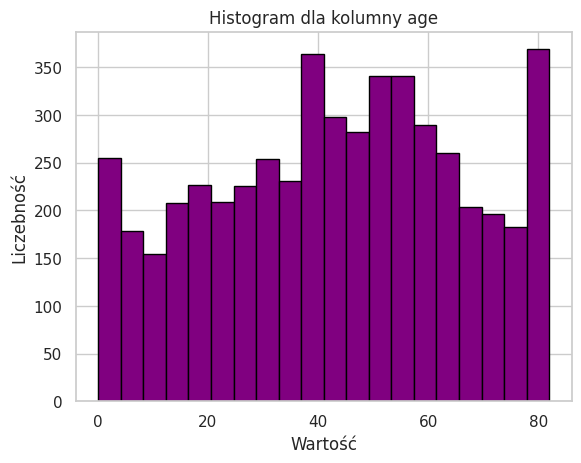

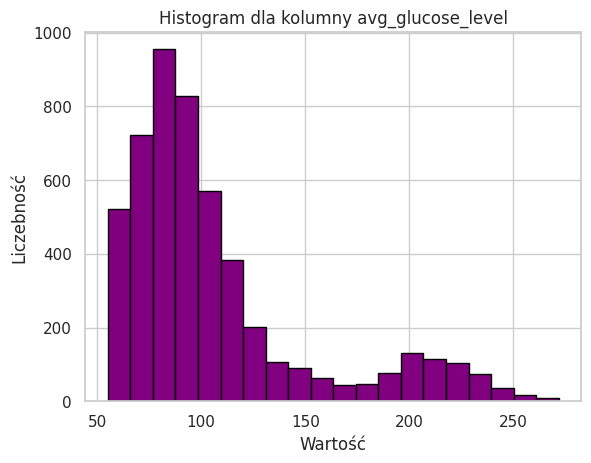

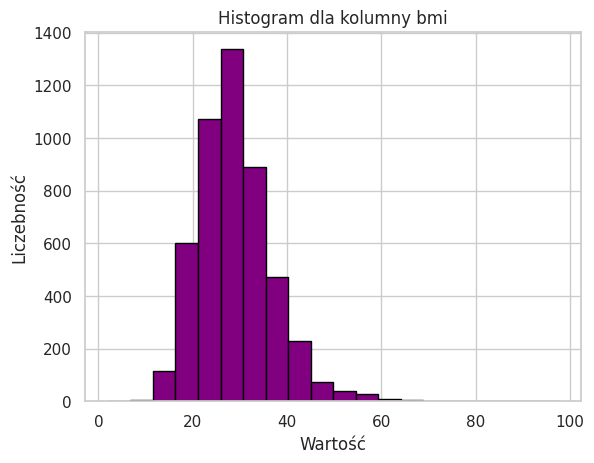

"\n'bmi':\nWartości w kolumnie 'bmi' tworzą rozkład normalny, który jest nieco prawostronnie skośny. Od razu rzucają się w oczy wartości odstające,\nktóre wskazują na zarówno bardzo niskie BMI, jak i bardzo wysokie, które świadczyłyby o ogromnie skrajnej otyłości. Te wartości na pewno\nzostaną zamienione.\n"

In [ ]:
#Stworzyłam histogramy kolumn numerycznych
for i in numerical_columns:
  plt.hist(healthcare[i], color='purple', bins=20, edgecolor='black')
  plt.title(f"Histogram dla kolumny {i}")
  plt.ylabel("Liczebność")
  plt.xlabel("Wartość")
  plt.show()

"""
'age':
Jak widać poniżej dla kolumny 'age' wartości wydają się prawdopodobne - nie ma wartości ujemnych (co wskazywało by na błędne dane)
Wiek około 80 również nie jest bardzo podejrzany - można by się zastanowić nad tym, że jest to jeden z najliczniejszych przedziałów wiekowych w zbiorze,
ale powiedziałabym, że jest to logiczne ze względu na to, że jest to badanie dotyczące udaru, zatem badani raczej będą ludzie starsi.
Bardziej podejrzana jest duża liczba badanych dzieci - ryzyko udaru mózgu wzrasta z wiekiem, więc badanie powinno być raczej przeprowadzane wśród dorosłych,
aczkolwiek z drugiej strony udar może wystąpić w każdym wieku, w tym u dzieci, więc założę, że kolumna 'age' nie zawiera anomalii.
Rozkład tej kolumny nie jest normalny, ale może to świadczyć o pewnej losowości w doborze pacjentów.
"""

"""
'avg_glucose_level':
Histogram kolumny 'avg_glucose_level' jest przechylony w prawo, a także niesymetrycznie dwumodalny. Wartości wskazują na bardzo skrajne wartości. Według tych danych:

Prawidłowy cukier na czczo:
    70-99 mg/dl – prawidłowy poziom cukru na czczo
    100-125 mg/dl – zaburzenia tolerancji glukozy (stan przedcukrzycowy)
    > 126  mg/dl - cukrzyca

Normy glikemii w 120. minucie doustnego  testu tolerancji glukozy (OGTT):
    < 140 mg/dl – wynik prawidłowy
    140–199 mg/dl – nieprawidłowa tolerancja glukozy
     ≥ 200 mg/dl - cukrzyca

Ciężko nawet stwierdzić, czy pacjenci byli badani na czczo czy też po zażyciu doustnego testu tolerancji glukozy, ponieważ
rozrzut najmniejszej i największej wartości są bardzo duże. Można by wręcz stwierdzić, że pacjenci byli badani zarówno na czczo
jak i po zarzuciu testu. Zdecydowana większość jest jednak z zakresu od ok. 50 do ok. 130 mg/dl, zatem niepokoić może duża liczba
pacjnetów, których glukoza jest wyższa niż ta górna wartość. Dochodzi nawet do 270 mg/dl, co już wzkazuje na bardzo skrajne wartości.
"""

"""
'bmi':
Wartości w kolumnie 'bmi' tworzą rozkład normalny, który jest nieco prawostronnie skośny. Od razu rzucają się w oczy wartości odstające,
które wskazują na zarówno bardzo niskie BMI, jak i bardzo wysokie, które świadczyłyby o ogromnie skrajnej otyłości. Te wartości na pewno
zostaną zamienione.
"""

In [ ]:
"""
Wyświetliłam pewne wartości, takie jak liczba dzieci, które mają poniżej rok, a także poniżej 18 lat
  (ze względu na obecność wartości 'children' w kolumnie 'work_type'; poniżej 18 roku życia jest 854 pacjentów,
  zaś w kolumnie 'work_type' jest 687 wartości 'children' - nie stanowi to zatem dużej nieścisłości, bo może tak być, że
  młodzi zaczynają jakieś drobne prace dorywcze).
Sprawdziłam ilość pacjentów, których glukoza jest poniżej 70 oraz powyżej 200 mg/dl - jest ich dosyć znacząca liczba,
  ponieważ aż 1183 pacjentów ma takie skrajne wartości glukozy.
Wyświetliłam także ilość obserwacji, w których BMI i jest mniejsze od 18 i większe od 40. Tutaj też wyszło stosunkowo
  dużo pacjentów o tak skrajnych wartości BMI.
"""

print("Ilość dzieci poniżej 1 roku życia w badaniu: ", healthcare[(healthcare['age'] < 1)].shape[0])
print("Ilość dzieci (poniżej 18 roku życia) w badaniu: ", healthcare[(healthcare['age'] < 18)].shape[0])
print("Ilość ekstremalnych wartości glukozy we krwi (za niska lub za mała): ", healthcare[(healthcare['avg_glucose_level'] < 70) | (healthcare['avg_glucose_level'] > 200)].shape[0])
print("Ilość ekstremalnych wartości BMI (za niskie lub za małe): ", healthcare[(healthcare['bmi'] < 18) | (healthcare['bmi'] > 40)].shape[0])

Ilość dzieci poniżej 1 roku życia w badaniu:  43
Ilość dzieci (poniżej 18 roku życia) w badaniu:  854
Ilość ekstremalnych wartości glukozy we krwi (za niska lub za mała):  1183
Ilość ekstremalnych wartości BMI (za niskie lub za małe):  674


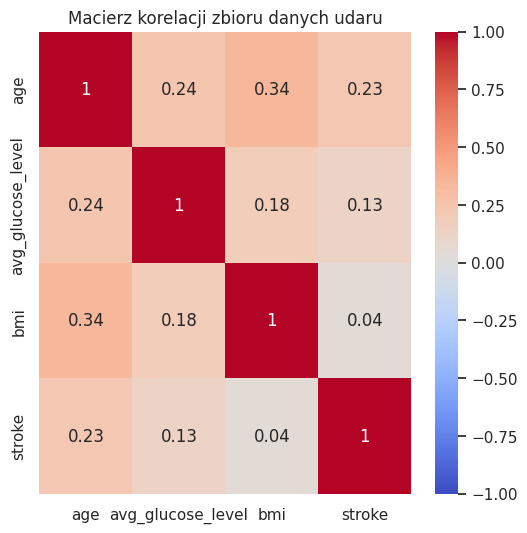

In [ ]:
"""
Stworzyłam wykres korelacji wartości numerycznej z wartością, którą będę przewidywać - 'stroke'.
Można zauważyć, że korelacja tych kolumn nie jest zbyt duża w odniesnieu do kolumny 'stroke'.
Największa korelacja dla udaru występuje z kolumną 'age', co jest bardzo logiczne, ponieważ
ryzyko wystąpienia udaru rośnie wraz z wiekiem.
"""

cor_mat = healthcare[['age', 'avg_glucose_level', 'bmi', 'stroke']].dropna().corr().round(2)
plt.figure(figsize=(6,6))
sns.heatmap(cor_mat, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title("Macierz korelacji zbioru danych udaru")
plt.show()

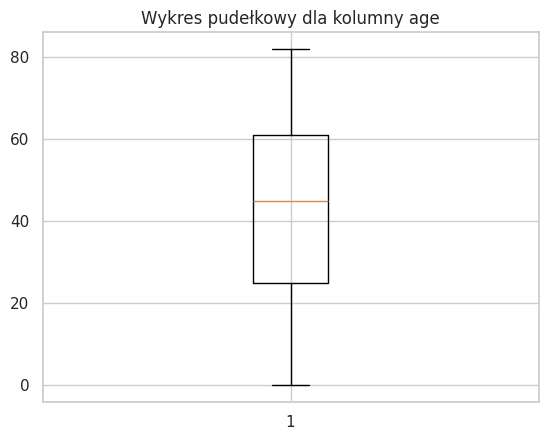

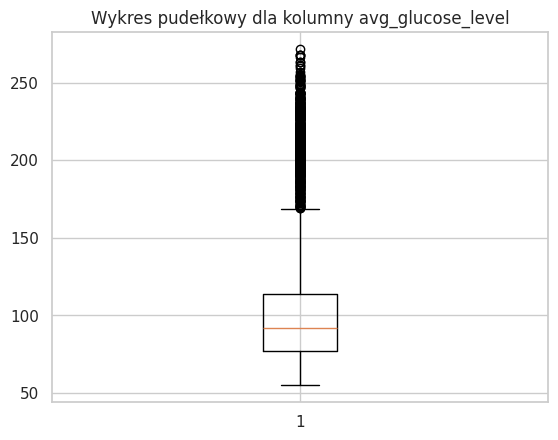

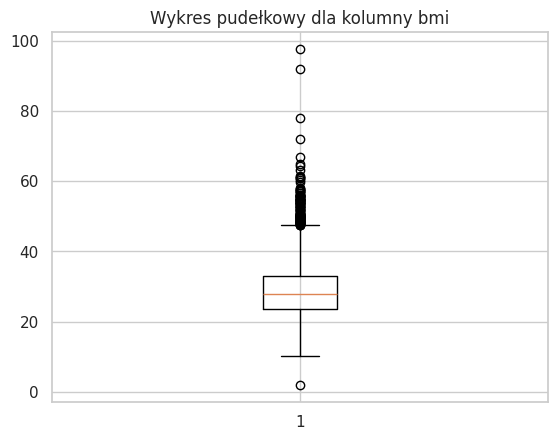

In [ ]:
"""
Stworzyłam także wykresy pudełkowe dla wartości numerycznych.
Dla kolumny 'age' nie wykryto żadnych wartości odstających.
Dla wartości 'avg_glucose_level' wykryto bardzo dużo wartości odstających, ale nie będę na to patrzeć konkretnie
  ze strony matematycznej tylo na ustalone normy.
Podobnie ma się kolumna 'bmi'.
"""

for i in numerical_columns:
  plt.boxplot(healthcare[i].dropna())
  plt.title(f'Wykres pudełkowy dla kolumny {i}')
  plt.show()

In [ ]:
"""
W tym kroku usunęłam ze zbioru obserwacje, w której płeć była 'Other', a także te w których typ zamieszkania był wybrakowany
  (jedynie 29 obserwacji).
Zmniejszyłam także liczbę klas w kolumnie 'work_type' -> połączyłam 'children' oraz 'Never_worked' jako 'unemployed',
  'Private' i 'Self-employed' jako 'non_govt_job', a także zmieniłam nazwę 'Govt_job' na 'govt_job', dla estetyki.
"""

print(healthcare[(healthcare['gender'] == 'Other') | ((healthcare['residence_type'].isna()))].shape[0])
healthcare = healthcare[(healthcare['gender'] != 'Other') & ((healthcare['residence_type'] == 'Urban') | (healthcare['residence_type'] == 'Rural'))]
healthcare['work_type'] = healthcare['work_type'].replace({
    'children': 'unemployed',
    'Never_worked': 'unemployed',
    'Govt_job': 'govt_job',
    'Private': 'non_govt_job',
    'Self-employed': 'non_govt_job'
})

29


<ipython-input-1109-7782c4837629>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  healthcare['work_type'] = healthcare['work_type'].replace({


In [ ]:
healthcare.isna().sum()

,0
gender,0
age,37
hypertension,0
heart_disease,0
ever_married,0
work_type,0
residence_type,0
avg_glucose_level,18
bmi,236
smoking_status,0


In [ ]:
#Wyświetliłam ponownie informację o kolumnach.

healthcare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5081 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5081 non-null   object 
 1   age                5044 non-null   float64
 2   hypertension       5081 non-null   int64  
 3   heart_disease      5081 non-null   int64  
 4   ever_married       5081 non-null   object 
 5   work_type          5081 non-null   object 
 6   residence_type     5081 non-null   object 
 7   avg_glucose_level  5063 non-null   float64
 8   bmi                4845 non-null   float64
 9   smoking_status     5081 non-null   object 
 10  stroke             5081 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 476.3+ KB


In [ ]:
#Wyznaczyłam granice oraz outliery dla kolumn z wartościami numerycznymi.

from IPython.display import display
q1 = healthcare[numerical_columns].quantile(0.25)
q3 = healthcare[numerical_columns].quantile(0.75)
iqr = q3 - q1
low_bound = (q1 - 1.5 * iqr)
upp_bound = (q3 + 1.5 * iqr)
num_of_outliers_L = (healthcare[iqr.index] < low_bound).sum()
num_of_outliers_U = (healthcare[iqr.index] > upp_bound).sum()
outliers_15iqr = pd.DataFrame({'lower_boundary':low_bound, 'upper_boundary':upp_bound, 'num_of_outliers_L':num_of_outliers_L, 'num_of_outliers_U':num_of_outliers_U})
pd.set_option('display.max_columns', None)
display(outliers_15iqr)

,lower_boundary,upper_boundary,num_of_outliers_L,num_of_outliers_U
age,-29.00,115.00,0,0
avg_glucose_level,22.16,169.16,0,619
bmi,9.10,47.50,1,107


In [ ]:
"""
Sprawdziłam ilość obserwacji, dla których bmi oraz poziom glukozy są bardzo skrajne.
Sprawdzane wartości i tak wskazują na bardzo skrajne poziomy (np. BMI 10 albo 60), ale są to założone przeze mnie minima i maksima.
W kolumnie 'bmi' nie ma takich obserwacji dużo - jedynie 13, można zatem rozważyć ich usunięcie.
W kolumnie 'avg_glucose_level' sprawa ma się nieco inaczej - jest takich obserwacji aż 245, co stanowi około 5% zbioru.

Myślałam nad całkowitą zamianą tych wartości bardzo skrajnych na średnią albo wartości wyznaczone za pomocą KNN,
ale trochę zaburzało to rozkłady kolumn, więc zdecydowałam się na usunięcie obserwacji, jako że finalnie nie jest ich aż tak dużo.
"""

print("Skrajne BMI: ", (healthcare[(healthcare['bmi'] < 10) | (healthcare['bmi'] > 60)].shape[0]))
print("Skrajna glukoza: ", (healthcare[(healthcare['avg_glucose_level'] < 60) | (healthcare['avg_glucose_level'] > 250)].shape[0]))

print("BMI W NORMIE: ",healthcare[(healthcare['bmi'] >= 10) & (healthcare['bmi'] <= 60)].shape[0])
print("GLUKOZA W NORMIE: ",healthcare[(healthcare['avg_glucose_level'] >= 60) & (healthcare['avg_glucose_level'] <= 250)].shape[0])

Skrajne BMI:  13
Skrajna glukoza:  245
BMI W NORMIE:  4832
GLUKOZA W NORMIE:  4818


In [ ]:
"""
Tak jak w poprzedniej komórce wspomniałam - usuwam ze zbioru obserwacje o bardzo skrajnym BMI oraz glukozie,
z uwzględnieniem aby nie usunąć wartości wybrakowanych - te można usupełnić, aby nie tracić już zbyt wiele informacji.
Finalnie i tak usunęłam nieco ponad 5% zbioru (ok. 5,57%), ale na tej wartości już poprzestanę.
"""

#print(healthcare[(healthcare['bmi'] < 10) | (healthcare['bmi'] > 60)])
#print("\n\n")
#print(healthcare[(healthcare['avg_glucose_level'] < 60) | (healthcare['avg_glucose_level'] > 250)])

healthcare = healthcare[(healthcare['bmi'].isna()) | ((healthcare['bmi'] >= 10) & (healthcare['bmi'] <= 60))]
healthcare = healthcare[(healthcare['avg_glucose_level'].isna()) | ((healthcare['avg_glucose_level'] >= 60) & (healthcare['avg_glucose_level'] <= 250))]
print(healthcare.shape)
healthcare.info()

(4825, 11)
<class 'pandas.core.frame.DataFrame'>
Index: 4825 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4825 non-null   object 
 1   age                4788 non-null   float64
 2   hypertension       4825 non-null   int64  
 3   heart_disease      4825 non-null   int64  
 4   ever_married       4825 non-null   object 
 5   work_type          4825 non-null   object 
 6   residence_type     4825 non-null   object 
 7   avg_glucose_level  4807 non-null   float64
 8   bmi                4594 non-null   float64
 9   smoking_status     4825 non-null   object 
 10  stroke             4825 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 452.3+ KB


In [ ]:
#Pozostałe wartości (wybrakowane NaN) - zamieniam za pomocą alogorytmu KNN.

"""
#Ewentualnie opcja ze średnią
mean_glucose = healthcare['avg_glucose_level'].mean()
healthcare['avg_glucose_level'] = healthcare['avg_glucose_level'].fillna(mean_glucose)
mean_bmi = healthcare['bmi'].mean()
healthcare['bmi'] = healthcare['bmi'].fillna(mean_bmi)
median_age = healthcare['age'].median()
healthcare['age'] = healthcare['age'].fillna(median_age)
"""

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
healthcare[numerical_columns] = scaler.fit_transform(healthcare[numerical_columns])

imputer = KNNImputer(n_neighbors=5)
healthcare[numerical_columns] = imputer.fit_transform(healthcare[numerical_columns])

healthcare[numerical_columns] = scaler.inverse_transform(healthcare[numerical_columns])

healthcare.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [ ]:
"""
Następnie wykonałam feature engineering, czyli dodałam kilka nowych kolumn, na podstawie już istniejących
  w celu zwiększenia zależności między kolumnami.
Dodałam kolumnę 'is_eldery' -> sprawdza czy pacjent ma powyżej 60 lat,
  'has_risk_factors' -> 0, 1 lub 2, w zależności od tego czy ma nadciśnienie albo choroby serca,
  'bmi_category' -> wskazuje czy pacjent ma niedowagę, nadwagę lub mieści się w normie,
  'glucose_binned' -> wskazuje czy pacjent ma nieskią, normalną albo wysoką glukozę.
"""

healthcare['is_elderly'] = (healthcare['age'] > 60).astype(int)
healthcare['has_risk_factors'] = healthcare['hypertension'] + healthcare['heart_disease']

def categorize_bmi(bmi):
    if bmi < 18.5:
        return 0   #'underweight'
    elif 18.5 <= bmi < 25:
        return 1   #'normal'
    elif 25 <= bmi < 30:
        return 2   #'overweight'
    else:
        return 3   #'obese'

healthcare['bmi_category'] = healthcare['bmi'].apply(categorize_bmi)

def bin_glucose(value):
    if value < 90:
        return 0  #'low'
    elif 90 <= value < 140:
        return 1  #'normal'
    else:
        return 2  #'high'

healthcare['glucose_binned'] = healthcare['avg_glucose_level'].apply(bin_glucose)

In [ ]:
#Następnie znowu wyświetliłam sobie statystyki dla numerycznych kolumn po modyfikacjach wartości w nich zawartych.
healthcare[numerical_columns].describe().drop('count')

,age,avg_glucose_level,bmi
mean,43.117672,107.601027,28.875391
std,22.488072,43.801038,7.439412
min,0.080000,60.010000,10.300000
25%,25.000000,79.090000,23.700000
50%,45.000000,93.200000,28.200000
75%,61.000000,115.160000,33.100000
max,82.000000,249.310000,59.700000


In [ ]:
#A także znowu wyświetlam początkowe wiersze, żeby sprawdzić jak wygląda zbiór po dodaniu kolumn.
healthcare.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_elderly,has_risk_factors,bmi_category,glucose_binned
0,Male,67.0,0,1,Yes,non_govt_job,Urban,228.69,36.60,formerly smoked,1,1,1,3,2
1,Female,61.0,0,0,Yes,non_govt_job,Rural,202.21,31.48,never smoked,1,1,0,3,2
2,Male,80.0,0,1,Yes,non_govt_job,Rural,105.92,32.50,never smoked,1,1,1,3,1
3,Female,49.0,0,0,Yes,non_govt_job,Urban,171.23,34.40,smokes,1,0,0,3,2
4,Female,79.0,1,0,Yes,non_govt_job,Rural,174.12,27.14,never smoked,1,1,1,2,2


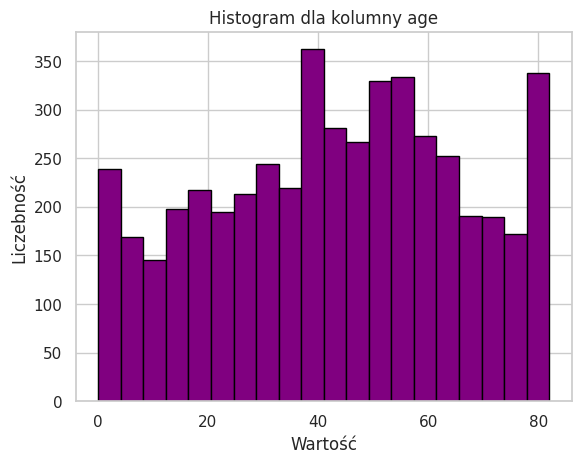

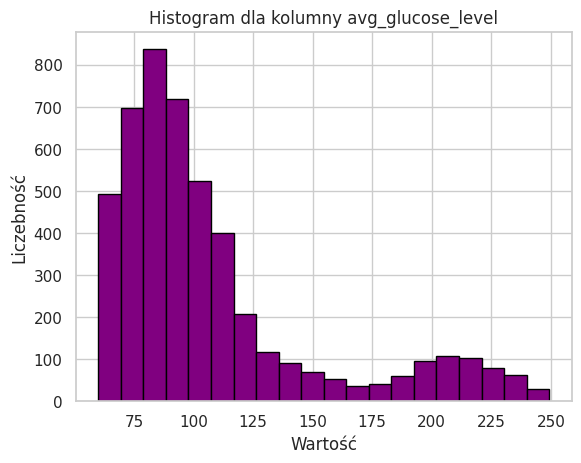

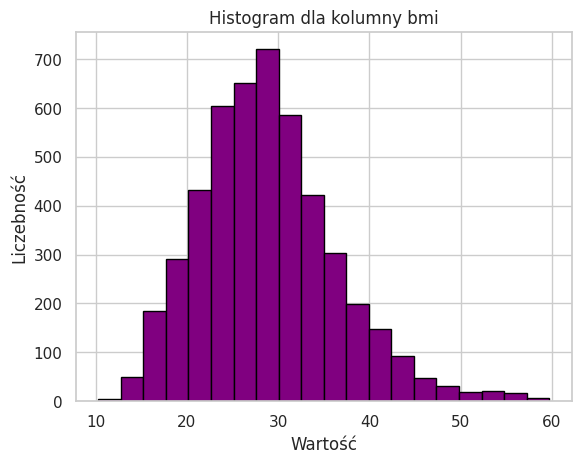

In [ ]:
#Ponownie stworzyłam histogramy dla kolumn numerycznych.

for i in numerical_columns:
  plt.hist(healthcare[i], color='purple', bins=20, edgecolor='black')
  plt.title(f"Histogram dla kolumny {i}")
  plt.ylabel("Liczebność")
  plt.xlabel("Wartość")
  plt.show()

In [ ]:
"""
A następnie przekształciłam wartości kategoryczne za pomocą Label Encoding.
Przy okazji sprawdzam od razu w jaki sposób zakodowały mi się wartości w danych kolumnach,
ponieważ będzie mi to potrzebne w następnym kroku.
"""

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le_columns = ['gender', 'ever_married', 'work_type', 'residence_type', 'smoking_status']
for i in le_columns:
  healthcare[i] = le.fit_transform(healthcare[i])
  print(dict(zip(le.classes_, le.transform(le.classes_))))

"""
#healthcare = pd.get_dummies(healthcare, columns=['bmi_category', 'glucose_binned'], drop_first=True)
bmi_order = {'underweight': 0, 'normal': 1, 'overweight': 2, 'obese': 3}
healthcare['bmi_category'] = healthcare['bmi_category'].map(bmi_order)

glucose_order = {'low': 0, 'normal': 1, 'high': 2}
healthcare['glucose_binned'] = healthcare['glucose_binned'].map(glucose_order)
"""

healthcare.head()

{'Female': np.int64(0), 'Male': np.int64(1)}
{'No': np.int64(0), 'Yes': np.int64(1)}
{'govt_job': np.int64(0), 'non_govt_job': np.int64(1), 'unemployed': np.int64(2)}
{'Rural': np.int64(0), 'Urban': np.int64(1)}
{'Unknown': np.int64(0), 'formerly smoked': np.int64(1), 'never smoked': np.int64(2), 'smokes': np.int64(3)}


,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke,is_elderly,has_risk_factors,bmi_category,glucose_binned
0,1,67.0,0,1,1,1,1,228.69,36.60,1,1,1,1,3,2
1,0,61.0,0,0,1,1,0,202.21,31.48,2,1,1,0,3,2
2,1,80.0,0,1,1,1,0,105.92,32.50,2,1,1,1,3,1
3,0,49.0,0,0,1,1,1,171.23,34.40,3,1,0,0,3,2
4,0,79.0,1,0,1,1,0,174.12,27.14,2,1,1,1,2,2


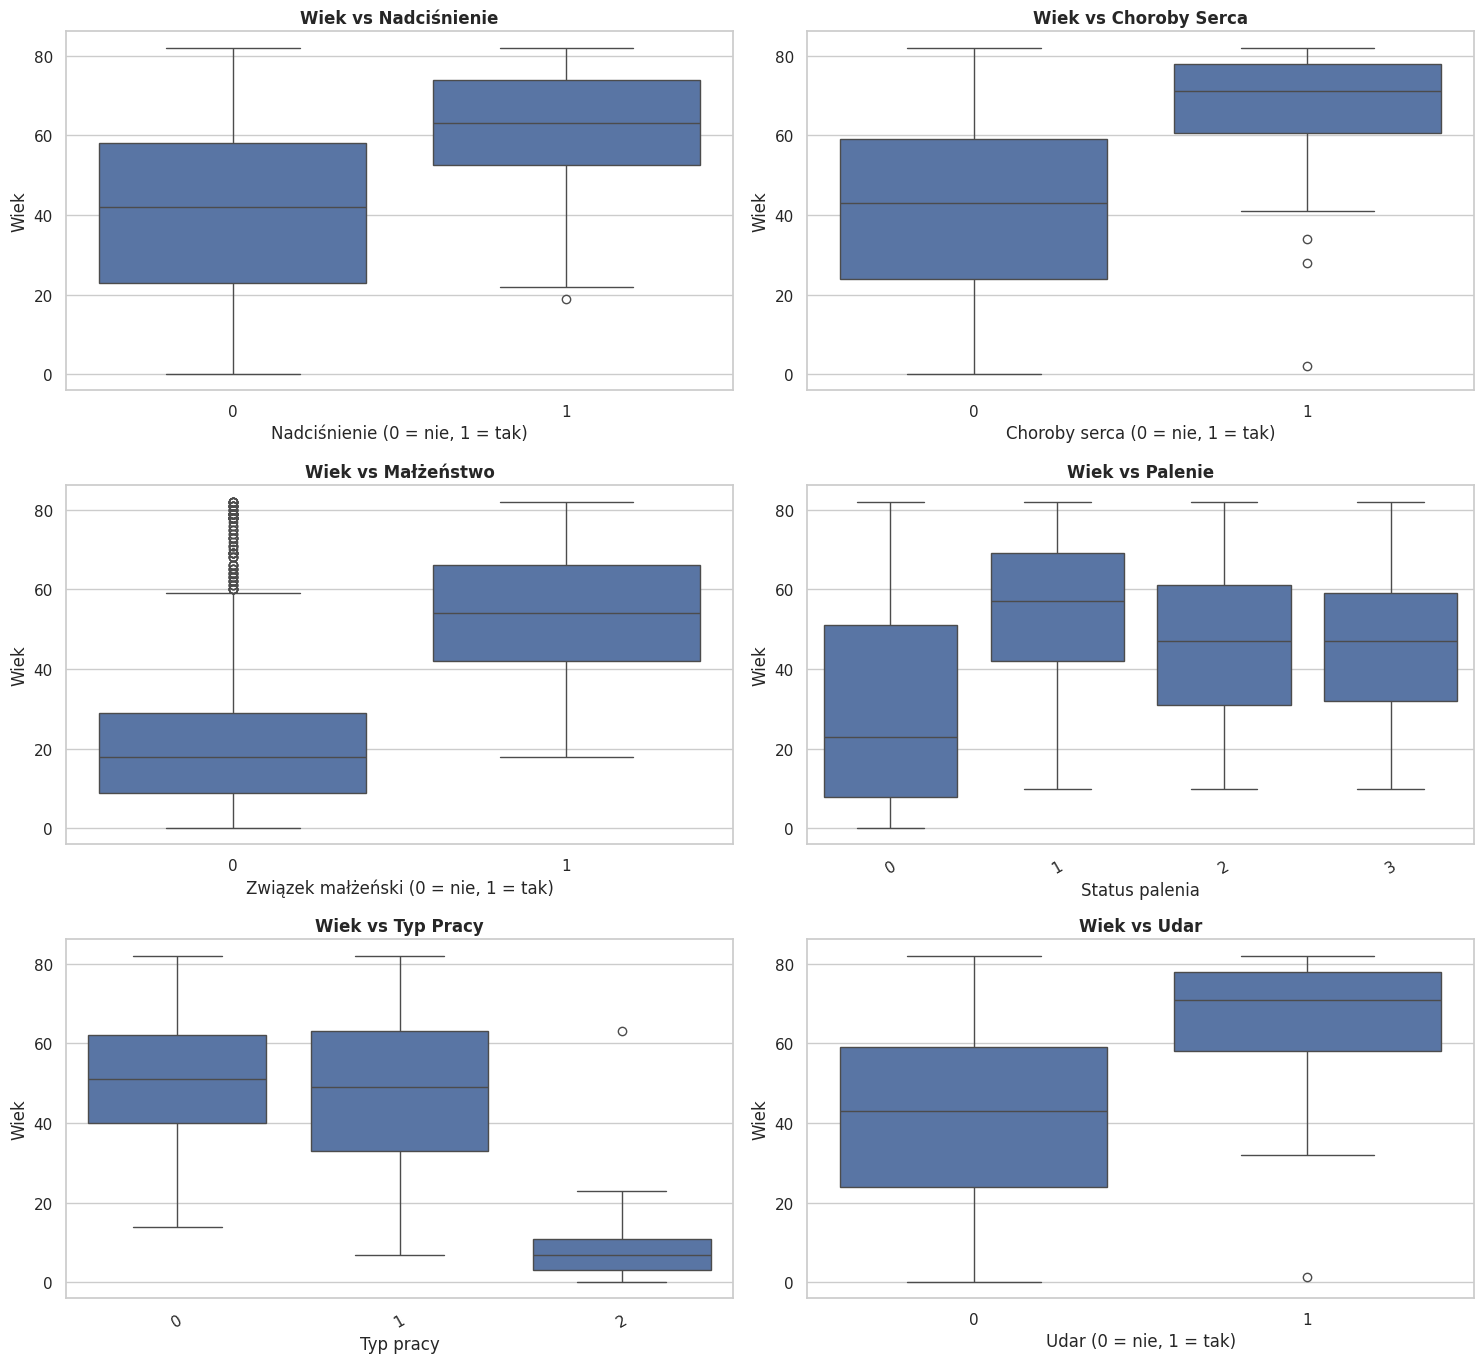

In [ ]:
"""
Tutaj chciałam sprawdzić jeszcze jak się mają dane względem wieku - jako że w zbiorze mamy dużo dzieci, to chciałam się upewnić,
  że obserwacje te mają sens.
Nadciśnienie, choroby serca oraz udary występują zdecydowanie częściej wśród dorosłych. Są jedynie odosobnione przypadki, w których
  osoba poniżej 20 roku życia doświadczyła którejś z tych rzeczy, a jak najbardziej mogą one wystąpić w młodym wieku, więc tutaj
  sens w zbiorze danych jest raczej zachowany.
Największe kontrowersje mogłyby wywoływać kolumny 'ever_married', 'smoking_status' oraz 'work_type' względem 'age', ale jak widać po
  wykresach pudełkowych, dane wydają się dosyć logiczne.
Związki małżeńskie wystąpiły najwcześniej dla pacjentów w wieku nieco przed 20 rokiem życia, co choć obecnie się często nie zdarza,
  to jednak teoretycznie może być prawdą, ponieważ (przynajmniej w Polsce) można zawrzeć związek małżeński, gdy ukończy się 18 lat.
Jeśli chodzi o typ pracy widać, że zdecydowaną większością wśród dzieci było 'unemployed'. Niepokoić może fakt, że w pracy w sektorze
  niepublicznym występują dzieci około 10 roku życia, aczkolwiek patrząc na to, że dziecko może być zatrudnione jako np. aktor
  dziecięcy, to również może być dana prawdziwa. Nie ma poza tym dużo takich przypadków, więc nie musi to być raczej powód do niepokoju.
Chyba najgorzej wygląda kolumna 'smoking_status' - boxploty 0 oraz 2 wskazują odpowiednio 'unknown' oraz 'never smoked', więc tutaj
  można założyć, że brak wiedzy również oznacza, że dziecko nie paliło (oby). Pole do dyskusji zostawiają wykresy 1 oraz 3, które
  oznaczają 'formerly smoked' oraz 'smokes'. Widać, że są obserwacje, w których dzieci w wieku około 10 lat palą albo paliły, ale
  przestały. Ciężko stwierdzić czy faktycznie to prawdziwe dane, ale jako że boxploty są w obu tych przypadkach przesunięte do góry,
  to jednak widać, że też są to ewentualnie bardzo odosobnione przypadki.
"""

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

#hypertension
sns.boxplot(x='hypertension', y='age', data=healthcare, ax=axes[0,0])
axes[0,0].set_title('Wiek vs Nadciśnienie', fontweight='bold')
axes[0,0].set_xlabel('Nadciśnienie (0 = nie, 1 = tak)')
axes[0,0].set_ylabel('Wiek')

#heart disease
sns.boxplot(x='heart_disease', y='age', data=healthcare, ax=axes[0,1])
axes[0,1].set_title('Wiek vs Choroby Serca', fontweight='bold')
axes[0,1].set_xlabel('Choroby serca (0 = nie, 1 = tak)')
axes[0,1].set_ylabel('Wiek')

#ever married
sns.boxplot(x='ever_married', y='age', data=healthcare, ax=axes[1,0])
axes[1,0].set_title('Wiek vs Małżeństwo', fontweight='bold')
axes[1,0].set_xlabel('Związek małżeński (0 = nie, 1 = tak)')
axes[1,0].set_ylabel('Wiek')

#smoking status
sns.boxplot(x='smoking_status', y='age', data=healthcare, ax=axes[1,1])
axes[1,1].set_title('Wiek vs Palenie', fontweight='bold')
axes[1,1].set_xlabel('Status palenia')
axes[1,1].set_ylabel('Wiek')
axes[1,1].tick_params(axis='x', rotation=30)

#work type
sns.boxplot(x='work_type', y='age', data=healthcare, ax=axes[2,0])
axes[2,0].set_title('Wiek vs Typ Pracy', fontweight='bold')
axes[2,0].set_xlabel('Typ pracy')
axes[2,0].set_ylabel('Wiek')
axes[2,0].tick_params(axis='x', rotation=30)

#stroke
sns.boxplot(x='stroke', y='age', data=healthcare, ax=axes[2,1])
axes[2,1].set_title('Wiek vs Udar', fontweight='bold')
axes[2,1].set_xlabel('Udar (0 = nie, 1 = tak)')
axes[2,1].set_ylabel('Wiek')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

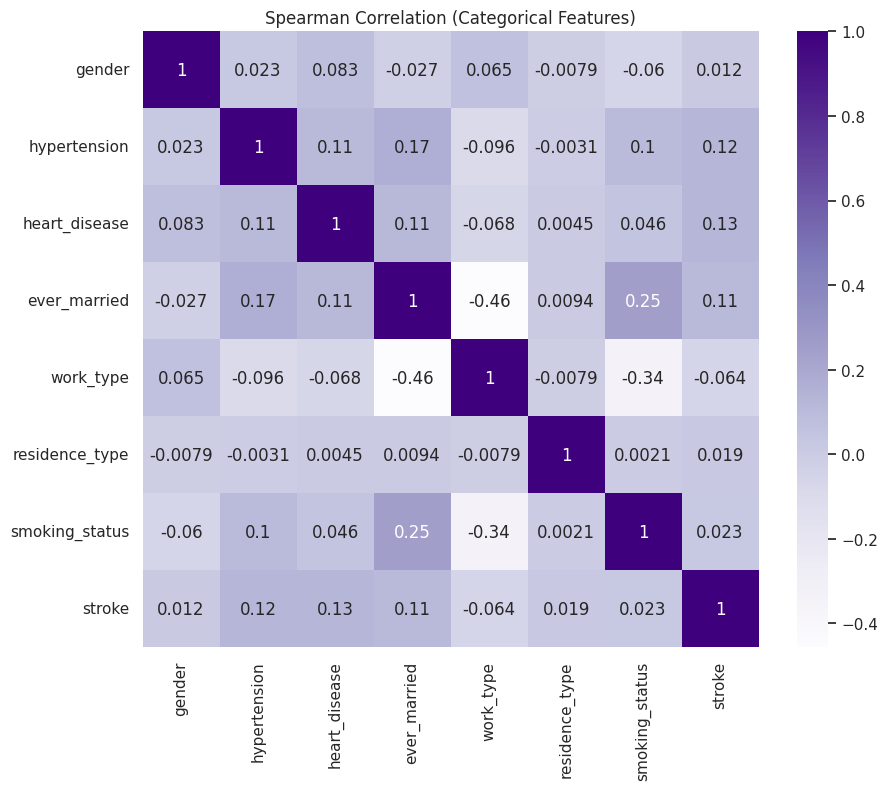

In [ ]:
"""
Stworzyłam wykres korelacji Spearmana dla kolumn kategorycznych.
Niestety można zauważyć, że przeważają niskie wartości korelacji.
Jeśli chodzi o zależności z kolumną 'stroke' można wyróżnić kolumnę dotyczącą nadciśnienia,
problemów z sercem oraz to czy było się kiedyś w związku małżeńskim (jest to logiczne,
ponieważ ta kolumna ma wyższą korelację z kolumną 'age', a 'age' ma jedną z większych wartości
korelacji do 'stroke').
"""

corr_spearman = healthcare[categorical_columns].corr(method='spearman')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, cmap='Purples', square=True)
plt.title('Spearman Correlation (Categorical Features)')
plt.show()

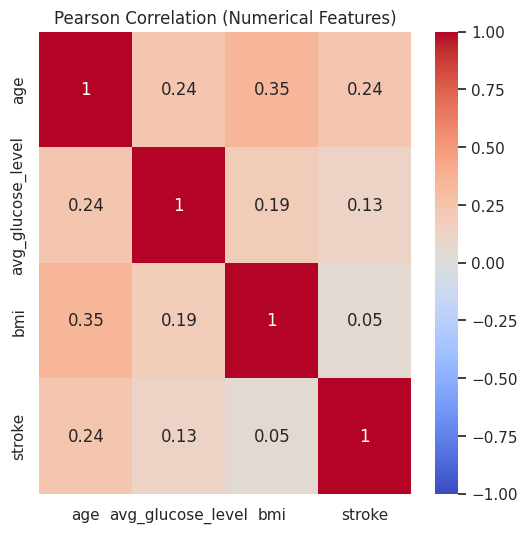

In [ ]:
"""
Tutaj prezentuje się wykres korelacji dla wartości numerycznych.
Względem kolumny 'stroke' można wyróżnić kolumę z 'age', co jest bardzo logiczne, bo ryzyko udaru rośnie wraz z wiekiem.
Stosunkowo wysoką (jak na te standardy) korelację ma także kolumna dotycząca glukozy we krwi.
"""
cor_mat = healthcare[['age', 'avg_glucose_level', 'bmi', 'stroke']].dropna().corr().round(2)
plt.figure(figsize=(6,6))
sns.heatmap(cor_mat, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation (Numerical Features)")
plt.show()

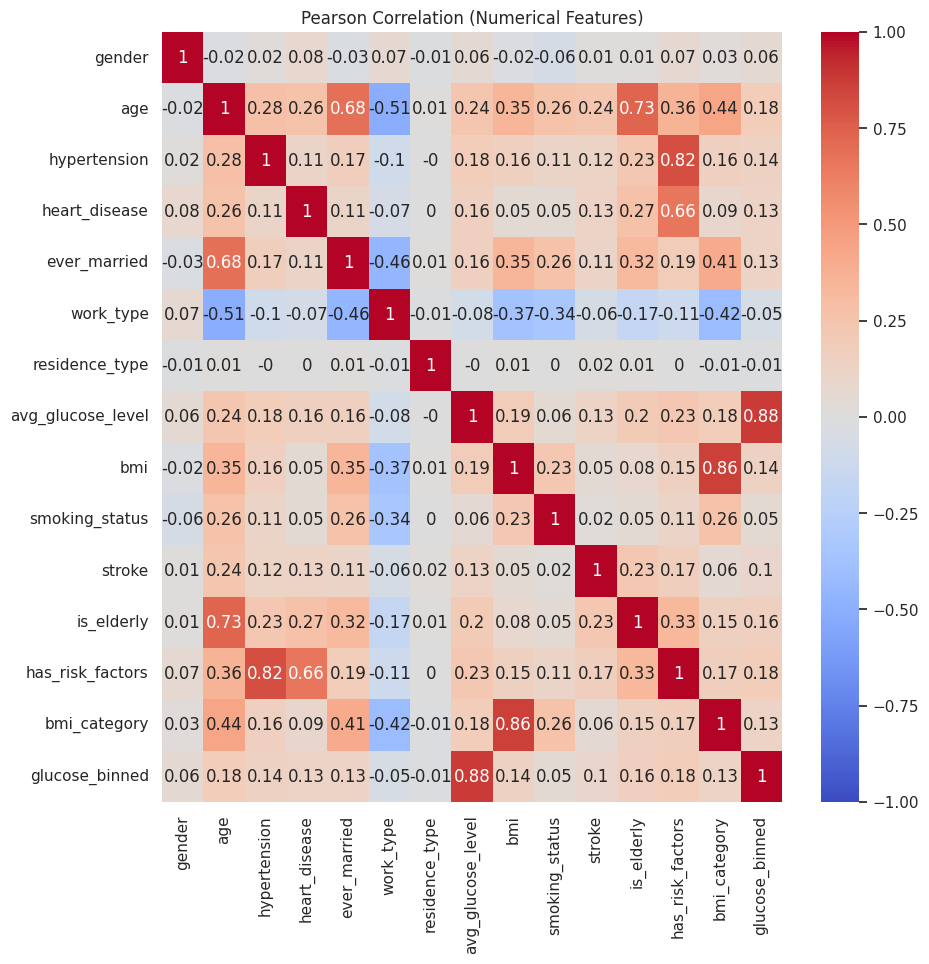

In [ ]:
"""
Tutaj widoczny jest całkowity wykres korelacji. Widoczne są także nowe kolumny, wśród których
'is_eldery' oraz 'has_risk_factors' wyróżniają się stosunkowo wysoką korelacją względem 'stroke'.
(Oczywiście rozważam to głównie względem wartości korelacji z kolumną 'stroke', a jako, że
najwyższa korelacja w tym przypadku to np. 0.24, to zakładam, że jest to stosunkowo wysoka wartość ;P)

Można by się zastanowić nad usunięciem ze zbioru kolumn, które mają bardzo niską korelację z kolumną 'stroke'
albo z nich powstały inne kolumny (np. usunięcie 'age', z którego powstało 'is_eldery', ale narazie nie będę
tego robić, ponieważ mimo że wartości nie wskazują na wysokie korelacje, to może jednak przy tworzeniu modeli
dane kolumy okażą się nieco istotne).
"""
cor_mat = healthcare.corr().round(2)
plt.figure(figsize=(10,10))
sns.heatmap(cor_mat, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.title("Pearson Correlation (Numerical Features)")
plt.show()

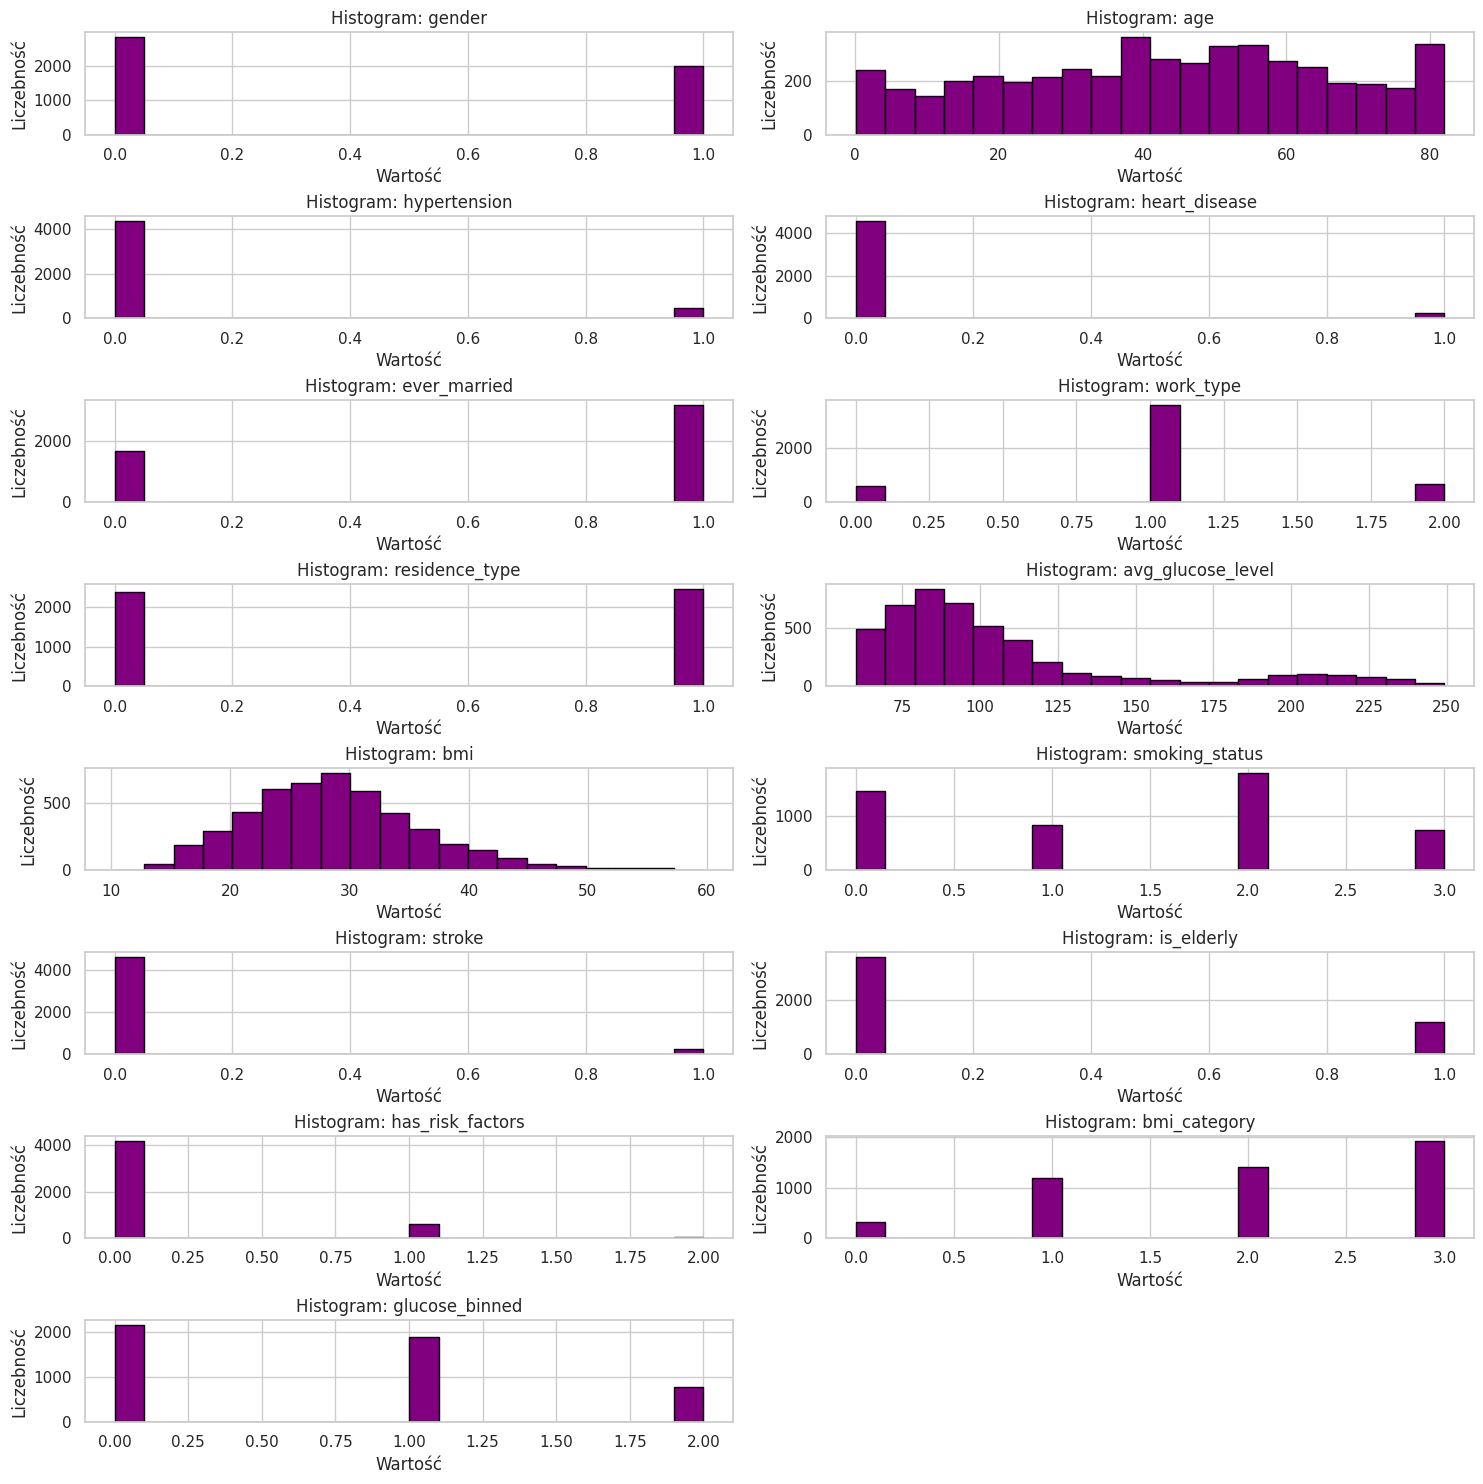

In [ ]:
"""
Stworzyłam sobie jeszcze histogramy wszystkich kolumn.
Widać, że kolumna 'stroke' jest bardzo niezbalansowana, zatem trzeba będzie dokonać oversamplingu.
"""

plt.figure(figsize=(15, 15))

for i in range(0,15):
    plt.subplot(8, 2, i + 1)  # 8 wierszy, 2 kolumn, i+1-ty wykres
    plt.hist(healthcare.iloc[:, i], color='purple', bins=20, edgecolor='black')
    plt.title(f"Histogram: {healthcare.columns[i]}")
    plt.xlabel("Wartość")
    plt.ylabel("Liczebność")

plt.tight_layout()
plt.subplots_adjust(hspace=0.8)
plt.show()


In [ ]:
"""
Następnie sprawdziłam ostateczną ilość obserwacji po czym podzieliłam dane na zbiory X i y oraz
wykonałam oversampling, żeby zbalansować klasy w kolumnie, na której będzie wykonywana predykcja.
Sprawdziłam ilość wszystich obserwacji oraz rozkład klas w kolumnie 'stroke' po wykonanu SMOTE.
Można zauważyć, że klasy zostały wyrównane, zostało utworzonych wiele nowych obserwacji na
podstawie już istniejących.
"""

print("ILOŚĆ WSZYSTKICH OBSERWACJI (przed SMOTE): ", len(healthcare))

X = healthcare.drop('stroke', axis=1)
y = healthcare['stroke']

print("Rozkład kolumny 'stroke' po SMOTE:\n", y.value_counts())

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print("ILOŚĆ WSZYSTKICH OBSERWACJI (po SMOTE): ", len(y_resampled))
print("Rozkład kolumny 'stroke' po SMOTE:\n", y_resampled.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, stratify=y_resampled, test_size=0.2, random_state=42)

ILOŚĆ WSZYSTKICH OBSERWACJI (przed SMOTE):  4825
Rozkład kolumny 'stroke' po SMOTE:
 stroke
0    4592
1     233
Name: count, dtype: int64
ILOŚĆ WSZYSTKICH OBSERWACJI (po SMOTE):  9184
Rozkład kolumny 'stroke' po SMOTE:
 stroke
1    4592
0    4592
Name: count, dtype: int64


Random Forest Report:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       919
           1       0.93      0.97      0.95       918

    accuracy                           0.95      1837
   macro avg       0.95      0.95      0.95      1837
weighted avg       0.95      0.95      0.95      1837

Cohen Kappa: 0.8965727327520964


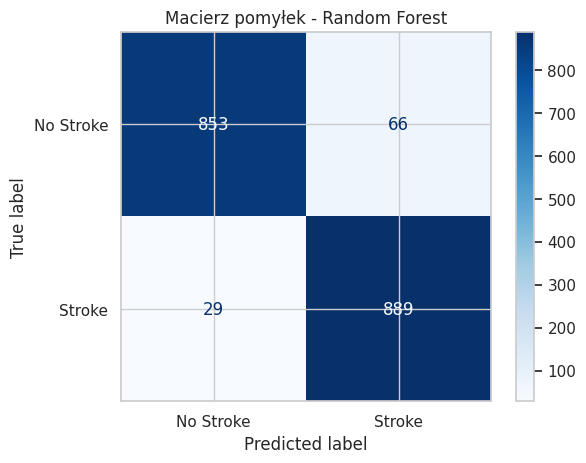

In [ ]:
"""
Najpierw stworzyłam model lasu losowego, a także sprawdziłam metryki za pomocą classification_report.
Oddzielnie obliczyłam także metrykę Cohen'a Kappa.
Wyświetliłam także wykres z macierzą pomyłek.
Zdecydowana większość została dobrze sklasyfikowana, a same metryki prezentują się dosyć solidnie,
ale jednak nie jest to jeszcze idealny model. 95 obserwacji zostało nieprawidłowo sklasyfikowanych.
"""

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))
print(f"Cohen Kappa: {cohen_kappa_score(y_test, y_pred_rf)}")

# macierz pomyłek
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['No Stroke', 'Stroke'])
cm_disp_rf.plot(cmap='Blues', values_format='d')

plt.title("Macierz pomyłek - Random Forest")
plt.show()

<Axes: title={'center': 'Ważność cech - Random Forest'}>

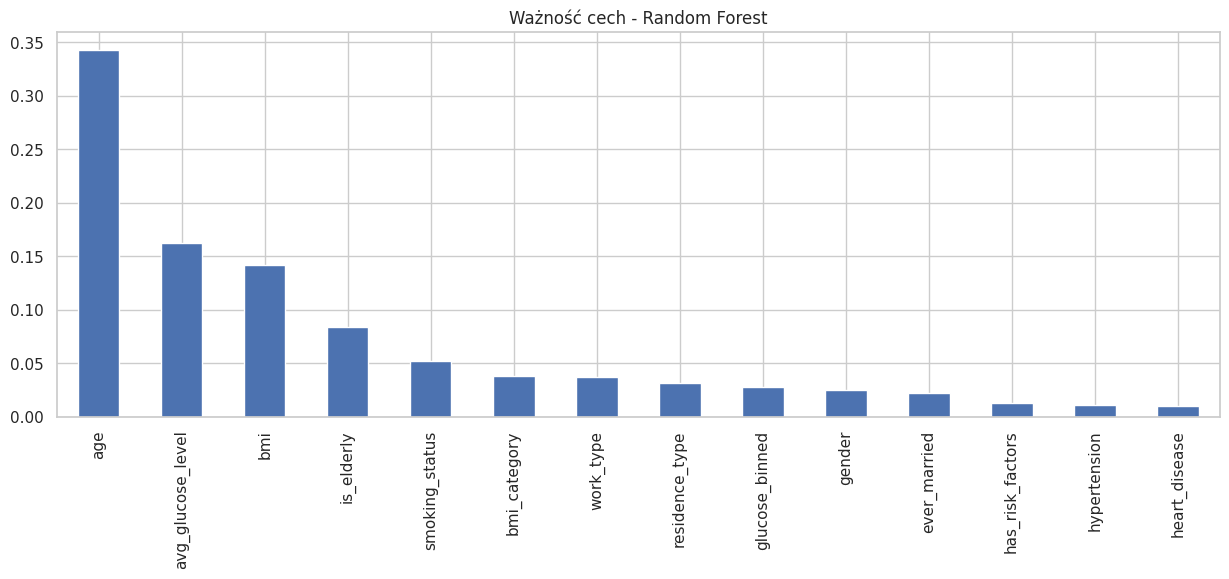

In [ ]:
#Wyświetliłam ważność cech tego modelu. Można by ewentualnie pomyśleć nad usunięciem cech najmniej istotnych.
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(15,5), title='Ważność cech - Random Forest')

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [20:18:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       919
           1       0.94      0.97      0.95       918

    accuracy                           0.95      1837
   macro avg       0.95      0.95      0.95      1837
weighted avg       0.95      0.95      0.95      1837

Cohen Kappa: 0.9020157504954626


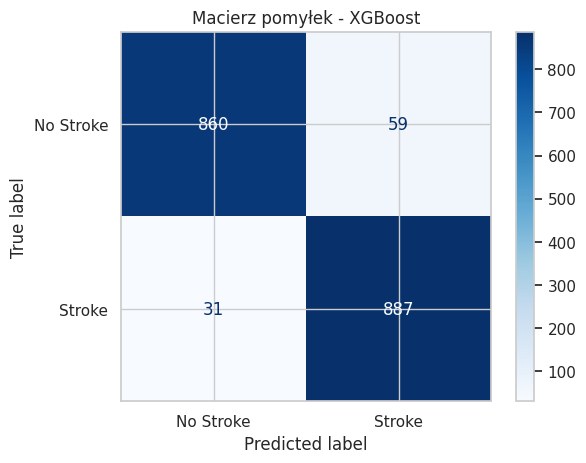

In [ ]:
"""
Analogicznie do lasu losowego, stworzyłam model XGBoost. Sprawdziłam jego metryki oraz macierz pomyłek.
Wyniki są bardzo zbliżone do poprzedniego modelu, a nawet nieco lepsze. Tutaj 90 obserwacji zostało
nieprawidło sklasyfikowane, więc o 5 mniej.
"""

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print("XGBoost Report:")
print(classification_report(y_test, y_pred_xgb))
print(f"Cohen Kappa: {cohen_kappa_score(y_test, y_pred_xgb)}")

#macierz pomyłek
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['No Stroke', 'Stroke'])
cm_disp_xgb.plot(cmap='Blues', values_format='d')

plt.title("Macierz pomyłek - XGBoost")
plt.show()

<Axes: title={'center': 'Ważność cech - XGBoost'}>

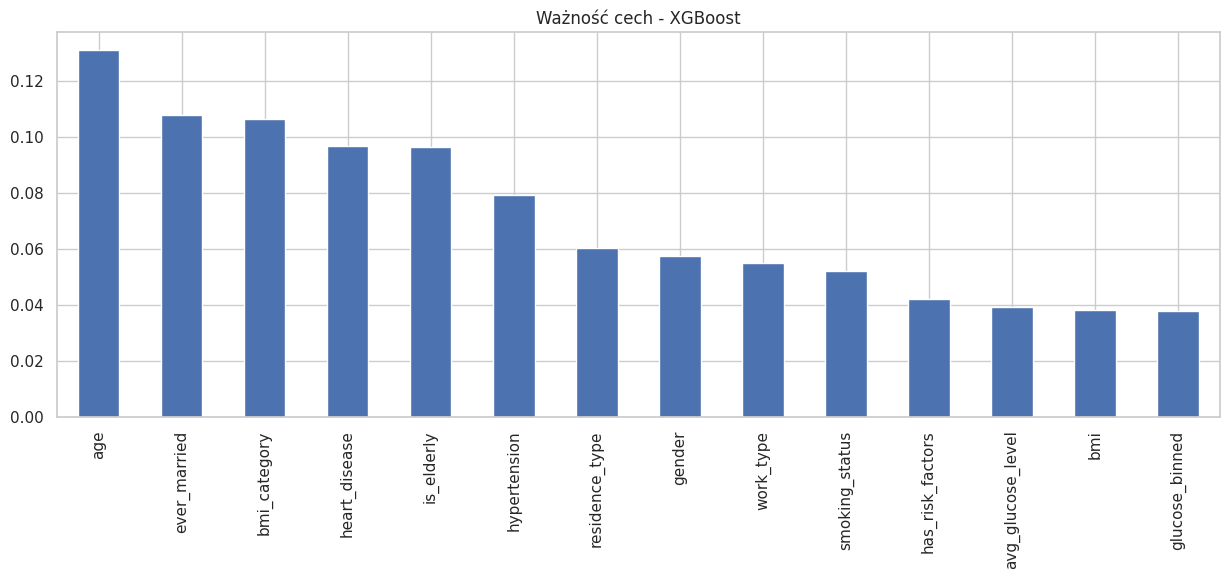

In [ ]:
#Tutaj ważność cech zdecydowanie różni się od lasu losowego.
xgb_importances = pd.Series(xgb.feature_importances_, index=X.columns)
xgb_importances.sort_values(ascending=False).plot(kind='bar', figsize=(15,5), title='Ważność cech - XGBoost')

In [ ]:
#!pip install --upgrade tensorflow

In [ ]:
"""
Na koniec stworzyłam jeszcze przykładową, prostą sieć neuronową, aby porównać jej działanie
do wcześniejszych modeli. Ostatecznie osiąga jednak nieco gorsze metryki.
"""

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

#standaryzacja
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_nn = scaler.fit_transform(X_train)
X_test_nn = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # klasyfikacja binarna, więc sigmoid i 1 warstwa zwracana

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_nn, y_train, epochs=30, batch_size=32, validation_split=0.2)

#ewaluacja modelu
loss, accuracy = model.evaluate(X_test_nn, y_test)
print(f"Dokładność sieci neuronowej: {accuracy:.4f}")


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7557 - loss: 0.5235 - val_accuracy: 0.8027 - val_loss: 0.4035
Epoch 2/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8250 - loss: 0.3790 - val_accuracy: 0.8361 - val_loss: 0.3496
Epoch 3/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8585 - loss: 0.3244 - val_accuracy: 0.8490 - val_loss: 0.3357
Epoch 4/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8736 - loss: 0.3026 - val_accuracy: 0.8422 - val_loss: 0.3348
Epoch 5/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8753 - loss: 0.3014 - val_accuracy: 0.8510 - val_loss: 0.3328
Epoch 6/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8797 - loss: 0.2912 - val_accuracy: 0.8599 - val_loss: 0.3172
Epoch 7/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8755 - loss: 0.2915 - val_accuracy: 0.8592 - val_loss: 0.3202
Epoch 8/30
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8748 - loss: 0.2991 - val_accuracy: 0.8578 - val_

58/58 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Cohen Kappa: 0.7746318184485198


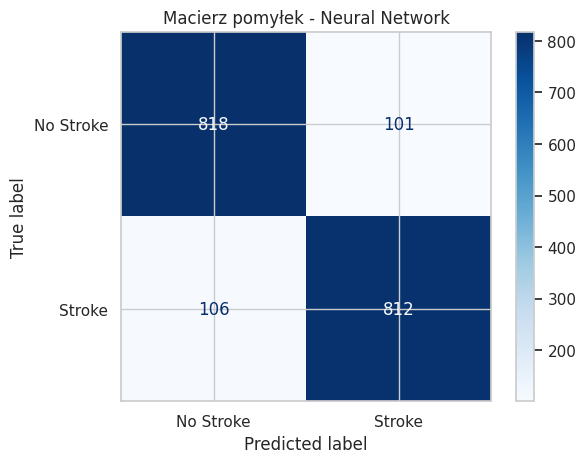

In [ ]:
"""
Tak jak poprzednio wyznaczyłam współczynnik Cohen Kappa oraz macierz pomyłek.
Jak widać ten model osiąga najgorsze wyniki z zaprezentowanych.
"""

y_pred_nn = (model.predict(X_test_nn) > 0.5).astype("int32")  # klasyfikacja binarna, więc musimy prawdopodobieństwo zamienić na 0 lub 1
print(f"Cohen Kappa: {cohen_kappa_score(y_test, y_pred_nn)}")

# Macierz pomyłek
cm_nn = confusion_matrix(y_test, y_pred_nn)
cm_disp_nn = ConfusionMatrixDisplay(confusion_matrix=cm_nn, display_labels=['No Stroke', 'Stroke'])
cm_disp_nn.plot(cmap='Blues', values_format='d')

plt.title("Macierz pomyłek - Neural Network")
plt.show()

In [ ]:
"""
Podsumowując, udało mi się stworzyć modele predykcyjne, które wskazują na całkiem wysokie wyniki metryk,
  jednakowoż nie są one idealne. Jest wiele obserwacji, które w dalszym ciągu zostały błędnie sklasyfikowane.
  Można by pokusić się jeszcze np. na tuning hyperparametrów, ale na ten moment tyle udało mi się osiągnąć.
Starałam się też jakoś zwizualizować dane, aczkolwiek wiem, że finalnie nie dałam aż tak dużo wykresów, także
  jest to pole do rozwinięcia.
Zastanawiam się co jeszcze mogłabym zrobić z tymi danymi albo czy coś zrobiłam nie do końca tak jak powinnam
  - z chęcią przyjmę podpowiedzi lub słowa krytyki ;P
"""

'\nPodsumowując, udało mi się stworzyć modele predykcyjne, które wskazują na całkiem wysokie wyniki metryk,\n  jednakowoż nie są one idealne. Jest wiele obserwacji, które w dalszym ciągu zostały błędnie sklasyfikowane.\n  Można by pokusić się jeszcze np. na tuning hyperparametrów, ale na ten moment tyle udało mi się osiągnąć. \nStarałam się też jakoś zwizualizować dane, aczkolwiek wiem, że finalnie nie dałam aż tak dużo wykresów, także\n  jest to pole do rozwinięcia.\nZastanawiam się co jeszcze mogłabym zrobić z tymi danymi albo czy coś zrobiłam nie do końca tak jak powinnam\n  - z chęcią przyjmę podpowiedzi lub słowa krytyki ;P\n'